In [1]:
#Importing the necessary libraries
from paperscraper.pubmed import get_and_dump_pubmed_papers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

DEBUG:matplotlib:matplotlib data path: c:\Users\jprib\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\jprib\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\jprib\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\jprib\.matplotlib\fontlist-v330.json


In [58]:
# Define search terms and their synonyms
patch = ['"Cardiac Tissue"','"Cardiac Tissues"','"Heart Tissues"','"Heart Tissue"','"Heart Patches"','"Cardiac Patches"','"Cardiac Patch"', '"Heart Patch"','"myocardial patch"', '"Heart Tissue Engineering"', '"Cardiac Tissue Engineering"']
vascular = ['"Vascularized"', '"Vascularization"', '"vascular network"', '"Vascular Units"']
bioprinting = ['"Freeform Bioprinting"','"3D Printing"','"Bioprinted"','"Bioprinting"', '"three-dimensional bioprinting"','"3D bioprinting"', '"Biofabrication"', '"3D Printed"', '"Bioprinting 3D"', '"three-dimensional bioprinting"','"additive manufacturing"','"freeform reversible embedding of suspended hydrogels"']
piezoelectric = ['"Piezoelectric"','"Piezo"','"PVDF"', '"PVDF-TrFe"', '"polyvinylidene fluoride"', '"piezoelectric materials"', '"piezoelectric scaffold"','"Piezoelectric polymeric"']

# Define the date range in year increments 
queries = {}
for dates in range (2000,2025,1):
    date_dates = [f'"{dates}:{dates}[dp]"']
    queries[f'Cardiac_{dates}'] = [[patch,date_dates]]
    queries[f'Vascular_{dates}'] = [[vascular,date_dates]]
    queries[f'Bioprint_{dates}'] = [[bioprinting,date_dates]]
    queries[f'Piezo_{dates}'] = [[piezoelectric,date_dates]]


In [59]:
# Perform the search and store them in a json file with the query name and date as the output file name
for query_name, query_list in queries.items():
        for query in query_list:
            get_and_dump_pubmed_papers(query, output_filepath=f'./json_files/{query_name}_PubMed.jsonl') 


In [63]:
# Define search terms and their synonyms using the same terms as above
def create_search_string(terms):
    # Join terms in each sublist with 'OR', and then join the sublists with 'AND'
    return ' AND '.join(['(' + ' OR '.join(sublist) + ')' for sublist in terms])

# Create search strings for each set of queries
search_strings = {key: [create_search_string(query) for query in value] for key, value in queries.items()}
search_strings

{'Cardiac_2000': ['("Cardiac Tissue" OR "Cardiac Tissues" OR "Heart Tissues" OR "Heart Tissue" OR "Heart Patches" OR "Cardiac Patches" OR "Cardiac Patch" OR "Heart Patch" OR "myocardial patch" OR "Heart Tissue Engineering" OR "Cardiac Tissue Engineering") AND ("2000:2000[dp]")'],
 'Vascular_2000': ['("Vascularized" OR "Vascularization" OR "vascular network" OR "Vascular Units") AND ("2000:2000[dp]")'],
 'Bioprint_2000': ['("Freeform Bioprinting" OR "3D Printing" OR "Bioprinted" OR "Bioprinting" OR "three-dimensional bioprinting" OR "3D bioprinting" OR "Biofabrication" OR "3D Printed" OR "Bioprinting 3D" OR "three-dimensional bioprinting" OR "additive manufacturing" OR "freeform reversible embedding of suspended hydrogels") AND ("2000:2000[dp]")'],
 'Piezo_2000': ['("Piezoelectric" OR "Piezo" OR "PVDF" OR "PVDF-TrFe" OR "polyvinylidene fluoride" OR "piezoelectric materials" OR "piezoelectric scaffold" OR "Piezoelectric polymeric") AND ("2000:2000[dp]")'],
 'Cardiac_2001': ['("Cardiac Ti

In [61]:
# Read the dumped data into different pandas DataFrames
# Get all JSON files in the current directory
json_files = [file for file in os.listdir(r'C:\Users\jprib\OneDrive\Desktop\PhD\Meta-Analysis\json_files') if file.endswith('.jsonl')]

# Create a dictionary to hold the dataframes
dfs = {}

# Load each JSON file into a separate pandas DataFrame and store it in the dictionary with the filename as the key
for json_file in json_files: 
    query_name = json_file.split('.')[0]
    dfs[query_name] = pd.read_json(os.path.join(r'C:\Users\jprib\OneDrive\Desktop\PhD\Meta-Analysis\json_files', json_file), lines=True)

dfs.keys()

dict_keys(['Bioprint_2000_PubMed', 'Bioprint_2001_PubMed', 'Bioprint_2002_PubMed', 'Bioprint_2003_PubMed', 'Bioprint_2004_PubMed', 'Bioprint_2005_PubMed', 'Bioprint_2006_PubMed', 'Bioprint_2007_PubMed', 'Bioprint_2008_PubMed', 'Bioprint_2009_PubMed', 'Bioprint_2010_PubMed', 'Bioprint_2011_PubMed', 'Bioprint_2012_PubMed', 'Bioprint_2013_PubMed', 'Bioprint_2014_PubMed', 'Bioprint_2015_PubMed', 'Bioprint_2016_PubMed', 'Bioprint_2017_PubMed', 'Bioprint_2018_PubMed', 'Bioprint_2019_PubMed', 'Bioprint_2020_PubMed', 'Bioprint_2021_PubMed', 'Bioprint_2022_PubMed', 'Bioprint_2023_PubMed', 'Bioprint_2024_PubMed', 'Cardiac_2000_PubMed', 'Cardiac_2001_PubMed', 'Cardiac_2002_PubMed', 'Cardiac_2003_PubMed', 'Cardiac_2004_PubMed', 'Cardiac_2005_PubMed', 'Cardiac_2006_PubMed', 'Cardiac_2007_PubMed', 'Cardiac_2008_PubMed', 'Cardiac_2009_PubMed', 'Cardiac_2010_PubMed', 'Cardiac_2011_PubMed', 'Cardiac_2012_PubMed', 'Cardiac_2013_PubMed', 'Cardiac_2014_PubMed', 'Cardiac_2015_PubMed', 'Cardiac_2016_PubMed'

In [72]:
def assign_dfs(dfs, term):
    assigned_df = pd.concat([df for key, df in dfs.items() if term.lower() in key.lower()], ignore_index=True)
    return assigned_df

vasculature = assign_dfs(dfs, 'Vascular')
cardiac = assign_dfs(dfs, 'Cardiac')
bioprint = assign_dfs(dfs, 'Bioprint')
piezo = assign_dfs(dfs, 'Piezo')

vasculature.shape, cardiac.shape, bioprint.shape, piezo.shape

((40075, 6), (18284, 6), (41539, 6), (21862, 6))

In [73]:
# Generate a column for each dataframe that contains the query name
for df, query_name in zip([vasculature, piezo, bioprint, cardiac], ['Vasculature', 'Piezo', 'Bioprinting', 'Cardiac Patch']):
    df['Query'] = query_name

# Concatenate the dataframes into a single dataframe
df = pd.concat([vasculature, piezo, bioprint, cardiac])

In [74]:
## Data Cleaning
# Check for duplicate titles in each row and drop duplicates
df_unique = df.drop_duplicates(subset='title', keep='first')

# Fill missing values in 'abstract' column with placeholder
df_unique.fillna({'abstract':'Not Available'}, inplace=True)

# Fill missing values in 'doi' column with placeholder
df_unique.fillna({'doi':'Not Available'}, inplace=True)

# Fill missing values in 'journal' column with placeholder
df_unique.fillna({'journal':'Not Available'}, inplace=True)

# Evaluate only from the year 2000 by creating a new column with the publication year
df_unique['year'] = df_unique['date'].dt.year
df_unique = df_unique[df_unique['year'] >= 2000]

df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106243 entries, 0 to 18270
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   title     106243 non-null  object        
 1   abstract  106243 non-null  object        
 2   journal   106243 non-null  object        
 3   date      106243 non-null  datetime64[ns]
 4   authors   106243 non-null  object        
 5   doi       106243 non-null  object        
 6   Query     106243 non-null  object        
 7   year      106243 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 6.9+ MB


C:\Users\jprib\AppData\Local\Temp\ipykernel_13204\3961397648.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.fillna({'abstract':'Not Available'}, inplace=True)
C:\Users\jprib\AppData\Local\Temp\ipykernel_13204\3961397648.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.fillna({'doi':'Not Available'}, inplace=True)
C:\Users\jprib\AppData\Local\Temp\ipykernel_13204\3961397648.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [41]:
#search for a phrase in the abstract of the dataframe
df[df['title'].str.contains('FRESH™ 3D bioprinted cardiac tissue, a bioengineered platform for in vitro pharmacology', case=False, na=False)]

#search for a phrase in the abstract of the dataframe
df_unique[df_unique['title'].str.contains('3D bioprinting', case=False, na=False)]

Series([], Name: title, dtype: object)

In [75]:
# Initialize a Count Dataframe and populate it with the number of papers published each year and for each query
count_df = df_unique.groupby(['year', 'Query']).size().unstack().fillna(0)
# Add a row that sums the number of papers published for each query
count_df.loc['Total'] = count_df.sum()


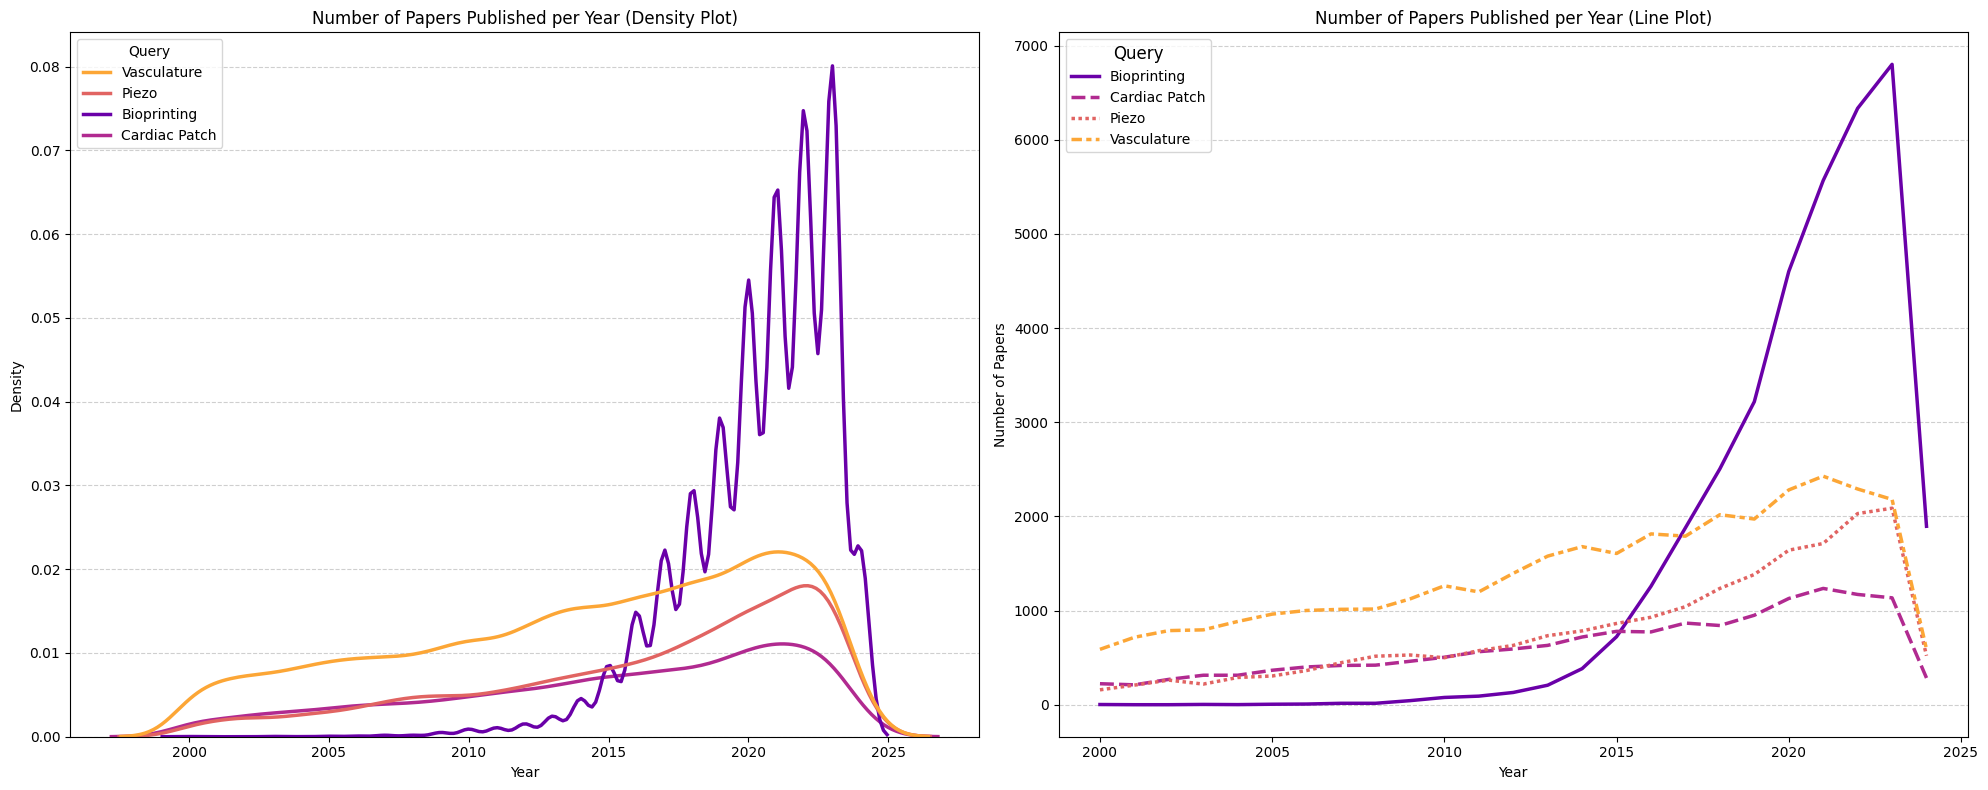

In [76]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the number of papers published per year as a density plot using seaborn using the query as the hue
# Define a custom palette dictionary
custom_palette = {
    'Bioprinting': (0.417642, 0.000564, 0.65839),
    'Cardiac Patch': (0.69284, 0.165141, 0.564522),
    'Piezo': (0.881443, 0.392529, 0.383229),
    'Vasculature': (0.98826, 0.652325, 0.211364)
}

# Plot the number of papers published per year as a density plot using seaborn using the query as the hue
sns.kdeplot(data=df_unique, x='year', hue='Query', palette=custom_palette, linewidth=2.5, ax=axes[0])
axes[0].set_title('Number of Papers Published per Year (Density Plot)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Density')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Plot the number of papers per year for each column (which is a query) in the count_df dataframe using sns
sns.lineplot(data=count_df.drop('Total'), linewidth=2.5, ax=axes[1], err_style="bars", palette=custom_palette)
axes[1].set_title('Number of Papers Published per Year (Line Plot)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Papers')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)
axes[1].legend(title='Query', title_fontsize='large', fontsize='medium')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [77]:
# Define a function to remove quotation marks from words in lists
def remove_marks(lst):
    return [word.replace('"', '') for word in lst]

# Define a function that will return the number of papers that contain a specific word in the title or abstract and frame the results
def search_and_frame(df, word, word_name):
    
    # If the word is a list of synonyms, join them with '|'
    if isinstance(word, list):
        word = '|'.join(word)
    else:
        word = word
    
    # Search every available abstract for the word and store it in a new column as 1 or 0
    # Search every available title for the word and store it in a new column as 1 or 0
    # Combine the results of the search in the title and abstract in a single column
    df[f'{word_name}'] = df['abstract'].str.contains(word, case=False).astype(int) | df['title'].str.contains(word, case=False).astype(int)
    
    return df

# Search in the title or abstract of different queried papers for words from the other queries to see if they intersect
query = [patch, vascular, bioprinting, piezoelectric]
names = ['Cardiac Patch', 'Vascularization', 'Bioprinting', 'Piezo']
for i in range(len(query)):
    df_unique = search_and_frame(df_unique, remove_marks(query[i]), names[i])

In [40]:
titles = [
'Three-Dimensional Bio-Printed Cardiac Patch for Sustained Delivery of Extracellular Vesicles from the Interface',
'3D-bioprinted cell-laden blood vessel with Dual drug delivery nanoparticles for advancing vascular regeneration',
'Design and Fabrication of Mature Engineered Pre-Cardiac Tissue Utilizing 3D Bioprinting Technology and Enzymatically Crosslinking Hydrogel',
'Electrospun Fibrous PVDF-TrFe Scaffolds for Cardiac Tissue Engineering, Differentiation, and Maturation',
'3D Bioprinted Spheroidal Droplets for Engineering the Heterocellular Coupling between Cardiomyocytes and Cardiac Fibroblasts',
'3D bioprinted alginate-gelatin hydrogel patches containing cardiac spheroids recover heart function in a mouse model of myocardial infarction',
'Towards engineering heart tissues from bioprinted cardiac spheroids',
'Bioprinting 3D Microfibrous Scaffolds for Engineering Endothelialized Myocardium and Heart-on-a-Chip',
'Biomaterial-Free Three-Dimensional Bioprinting of Cardiac Tissue using Human Induced Pluripotent Stem Cell Derived Cardiomyocytes',
'3D Printed Conductive Hydrogel Patch Incorporated with MSC@GO for Efficient Myocardial Infarction Repair',
'Bioprinting Cell- and Spheroid-Laden Protein-Engineered Hydrogels as Tissue-on-Chip Platforms',
'3D bioprinting of collagen to rebuild components of the human heart',
'3D Printing of Personalized Thick and Perfusable Cardiac Patches and Hearts',
'3D Printed Piezoelectric Wound Dressing with Dual Piezoelectric Response Models for Scar-Prevention Wound Healing',
'FRESH 3D bioprinting a contractile heart tube using human stem cell-derived cardiomyocytes'
]

#search for a phrase in the abstract of the dataframe
has_title = df_unique[df_unique['title'].str.contains('|'.join(titles), case=False, na=False)]
has_title
    

Series([], Name: title, dtype: object)

In [79]:
# Check which papers intersect, using boolean conectors, and store them in a column, which will be used to design a venn diagram
# Define a function that checks if a paper intersects with the other queries
# and stores the result in an appropriate column
# if Bioprinting & Cardiac Patch, then df['Bioprinting & Cardiac Patch'] = 1

df_unique['Cardiac_Patch_Bioprinting_Vasculature_Piezo'] = (df_unique['Cardiac Patch'] & df_unique['Vascularization'] & df_unique['Bioprinting'] & df_unique['Piezo'])
df_unique['Cardiac_Patch_Bioprinting_Vasculature'] = (df_unique['Cardiac Patch'] & df_unique['Vascularization'] & df_unique['Bioprinting'])
df_unique['Cardiac_Patch_Bioprinting_Piezo'] = (df_unique['Cardiac Patch'] & df_unique['Bioprinting'] & df_unique['Piezo'])
df_unique['Cardiac_Patch_Vasculature_Piezo'] = (df_unique['Cardiac Patch'] & df_unique['Vascularization'] & df_unique['Piezo'])
df_unique['Bioprinting_Vasculature_Piezo'] = (df_unique['Bioprinting'] & df_unique['Vascularization'] & df_unique['Piezo'])
df_unique['Cardiac_Patch_Bioprinting'] = (df_unique['Cardiac Patch'] & df_unique['Bioprinting'])
df_unique['Cardiac_Patch_Vasculature'] = (df_unique['Cardiac Patch'] & df_unique['Vascularization'])
df_unique['Cardiac_Patch_Piezo'] = (df_unique['Cardiac Patch'] & df_unique['Piezo'])
df_unique['Bioprinting_Vasculature'] = (df_unique['Bioprinting'] & df_unique['Vascularization'])
df_unique['Bioprinting_Piezo'] = (df_unique['Bioprinting'] & df_unique['Piezo'])
df_unique['Vasculature_Piezo'] = (df_unique['Vascularization'] & df_unique['Piezo'])

In [45]:
titles = [
'Three-Dimensional Bio-Printed Cardiac Patch for Sustained Delivery of Extracellular Vesicles from the Interface',
'3D-bioprinted cell-laden blood vessel with Dual drug delivery nanoparticles for advancing vascular regeneration',
'Design and Fabrication of Mature Engineered Pre-Cardiac Tissue Utilizing 3D Bioprinting Technology and Enzymatically Crosslinking Hydrogel',
'Electrospun Fibrous PVDF-TrFe Scaffolds for Cardiac Tissue Engineering, Differentiation, and Maturation',
'3D Bioprinted Spheroidal Droplets for Engineering the Heterocellular Coupling between Cardiomyocytes and Cardiac Fibroblasts',
'3D bioprinted alginate-gelatin hydrogel patches containing cardiac spheroids recover heart function in a mouse model of myocardial infarction',
'Towards engineering heart tissues from bioprinted cardiac spheroids',
'Bioprinting 3D Microfibrous Scaffolds for Engineering Endothelialized Myocardium and Heart-on-a-Chip',
'Biomaterial-Free Three-Dimensional Bioprinting of Cardiac Tissue using Human Induced Pluripotent Stem Cell Derived Cardiomyocytes',
'3D Printed Conductive Hydrogel Patch Incorporated with MSC@GO for Efficient Myocardial Infarction Repair',
'Bioprinting Cell- and Spheroid-Laden Protein-Engineered Hydrogels as Tissue-on-Chip Platforms',
'3D bioprinting of collagen to rebuild components of the human heart',
'3D Printing of Personalized Thick and Perfusable Cardiac Patches and Hearts',
'3D Printed Piezoelectric Wound Dressing with Dual Piezoelectric Response Models for Scar-Prevention Wound Healing',
'FRESH 3D bioprinting a contractile heart tube using human stem cell-derived cardiomyocytes'
]

#search for a phrase in the abstract of the dataframe
has_title = df_unique[df_unique['title'].str.contains('|'.join(titles), case=False, na=False)]
has_title

,title,abstract,journal,date,authors,doi,Query,year,Cardiac Patch,Vascularization,...,Cardiac_Patch_Bioprinting_Vasculature,Cardiac_Patch_Bioprinting_Piezo,Cardiac_Patch_Vasculature_Piezo,Bioprinting_Vasculature_Piezo,Cardiac_Patch_Bioprinting,Cardiac_Patch_Vasculature,Cardiac_Patch_Piezo,Bioprinting_Vasculature,Bioprinting_Piezo,Vasculature_Piezo
511,Bioprinting 3D microfibrous scaffolds for engi...,Engineering cardiac tissues and organ models r...,Biomaterials,2016-10-07,"[Yu ShrikeZhang, AndreaArneri, SimoneBersini, ...",10.1016/j.biomaterials.2016.09.003,Vasculature,2016,1,0,...,0,0,0,0,1,0,0,0,0,0
930,Biomaterial-Free Three-Dimensional Bioprinting...,We have developed a novel method to deliver st...,Scientific reports,2017-07-06,"[Chin SiangOng, TakumaFukunishi, HuaitaoZhang,...",10.1038/s41598-017-05018-4\n10.1161/HHF.0b013e...,Vasculature,2017,1,1,...,1,0,0,0,1,1,0,1,0,0
1142,3D Printing of Personalized Thick and Perfusab...,Generation of thick vascularized tissues that ...,"Advanced science (Weinheim, Baden-Wurttemberg,...",2019-06-11,"[NadavNoor, AssafShapira, ReuvenEdri, IdanGal,...",10.1002/advs.201900344,Vasculature,2019,1,1,...,1,0,0,0,1,1,0,1,0,0
1577,Bioprinting Cell- and Spheroid-Laden Protein-E...,"Human tissues, both in health and disease, are...",Frontiers in bioengineering and biotechnology,2020-05-16,"[Daniela FDuarte Campos, Christopher DLindsay,...",10.3389/fbioe.2020.00374\n10.1089/ten.tea.2011...,Vasculature,2020,0,0,...,0,0,0,0,0,0,0,0,0,0
1144,Towards engineering heart tissues from bioprin...,Current,Biofabrication,2021-07-16,"[LiudmilaPolonchuk, LydiaSurija, Min HoLee, Po...",10.1088/1758-5090/ac14ca,Vasculature,2021,1,0,...,0,0,0,0,1,0,0,0,0,0
1204,3D Printed Piezoelectric Wound Dressing with D...,During the long process of wound defect repair...,ACS applied materials & interfaces,2022-07-01,"[JiachenLiang, HuajingZeng, LiangQiao, HongJia...",10.1021/acsami.2c04168,Vasculature,2022,0,1,...,0,0,0,1,0,0,0,1,1,1
1547,3D bioprinting of collagen to rebuild componen...,Collagen is the primary component of the extra...,"Science (New York, N.Y.)",2019-08-03,"[ALee, A RHudson, D JShiwarski, J WTashman, T ...",10.1126/science.aav9051,Bioprinting,2019,0,1,...,0,0,0,0,0,0,0,1,0,0
5864,3D Bioprinted Spheroidal Droplets for Engineer...,Since conventional human cardiac two-dimension...,"Cyborg and bionic systems (Washington, D.C.)",2021-01-01,"[Raven ElKhoury, NaveenNagiah, Joel AMudloff, ...",10.34133/2021/9864212\n10.4252/wjsc.v11.i12.10...,Bioprinting,2021,0,0,...,0,0,0,0,0,0,0,0,0,0
568,Three-Dimensional Bio-Printed Cardiac Patch fo...,Cardiac tissue engineering has emerged as a pr...,"Gels (Basel, Switzerland)",2022-12-23,"[AssafBar, OlgaKryukov, SmadarCohen]",10.3390/gels8120769\n10.1038/nature10147\n10.1...,Bioprinting,2022,1,0,...,0,0,0,0,0,0,0,0,0,0
1020,Design and Fabrication of Mature Engineered Pr...,The fabrication of mature engineered cardiac t...,"Materials (Basel, Switzerland)",2022-11-27,"[ShintarohIwanaga, YutaHamada, YoshinariTsukam...",10.3390/ma15227928\n10.1089/ten.teb.2021.0012\...,Bioprinting,2022,1,0,...,0,0,0,0,1,0,0,0,0,0


In [80]:
# Check if they intersect via a venn diagram
# Drop everything but the colums needed to compare (Query and the columns with the boolean connectors) - save to a new df
venn_df = df_unique[['Query', 'Cardiac_Patch_Bioprinting_Vasculature_Piezo', 'Cardiac_Patch_Bioprinting_Vasculature', 'Cardiac_Patch_Bioprinting_Piezo', 'Cardiac_Patch_Vasculature_Piezo', 'Bioprinting_Vasculature_Piezo', 'Cardiac_Patch_Bioprinting', 'Cardiac_Patch_Vasculature', 
                           'Cardiac_Patch_Piezo', 'Bioprinting_Vasculature', 'Bioprinting_Piezo', 'Vasculature_Piezo']]


# Group by the query and sum the boolean connectors
venn_df_grouped = venn_df.groupby('Query').sum()


# Add a total column to the dataframe that totals the number of papers for each query (Total row from count_df)
venn_df_grouped['Total'] = count_df.loc['Total'].astype(int) # Convert the Total row to integers
venn_df_grouped['Total'] = venn_df_grouped['Total'] - venn_df_grouped.iloc[:, :-1].sum(axis=1) # Subtract the rows from the total
df = venn_df_grouped.T
df

Query,Bioprinting,Cardiac Patch,Piezo,Vasculature
Cardiac_Patch_Bioprinting_Vasculature_Piezo,0,0,0,0
Cardiac_Patch_Bioprinting_Vasculature,4,0,0,28
Cardiac_Patch_Bioprinting_Piezo,0,0,0,0
Cardiac_Patch_Vasculature_Piezo,0,0,0,1
Bioprinting_Vasculature_Piezo,0,0,0,2
Cardiac_Patch_Bioprinting,121,0,0,34
Cardiac_Patch_Vasculature,5,145,0,246
Cardiac_Patch_Piezo,0,8,16,1
Bioprinting_Vasculature,113,0,0,592
Bioprinting_Piezo,55,0,140,4


In [51]:
# Sum the rows into a column, called 'Total Intersected Papers'
df['Total Intersected Papers'] = df.sum(axis=0)

# Export the dataframe to a csv file
export_venn = df['Total Intersected Papers']

In [ ]:
# Plot a chord diagram with bookeh
import matplotlib.pyplot as plt
import holoviews as hv
from holoviews import opts, dim

hv.extension('bokeh')
hv.output(size=200)

# Import necessary libraries
import matplotlib.pyplot as plt
# Enable bokeh extension for holoviews
hv.extension('bokeh')
hv.output(size=200)

# Define chord data
chord_df = pd.DataFrame({
    'source': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3],
    'target': [1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2],
    'value': [100, 2396, 687, 100, 813, 211, 2396, 813, 3740, 687, 211, 3740]
})

# Define nodes data
nodes_df = pd.DataFrame({
    'index': [0, 1, 2, 3],
    'name': ['Bioprinting', 'Cardiac Patch', 'Piezo', 'Vasculature']
})

# Create holoviews dataset for nodes
nodes = hv.Dataset(nodes_df, 'index')

# Create chord plot
chord = hv.Chord((chord_df, nodes)).select(value=(4, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()),
    opts.Labels(text_font_size='12pt', text_color='black'),
    opts.Nodes(size=20, line_color='white'),
    opts.Graph(width=600, height=600)
)

# Display the chord plot
chord

In [ ]:
# Make a chord diagram to show the intersections between the queries
# 1st -> Create an intersection column ('Intersections') and assign the boolean values to it

intersection_columns = ['Cardiac_Patch_Bioprinting_Vasculature_Piezo', 'Cardiac_Patch_Bioprinting_Vasculature', 'Cardiac_Patch_Bioprinting_Piezo', 
                        'Cardiac_Patch_Vasculature_Piezo', 'Bioprinting_Vasculature_Piezo', 'Cardiac_Patch_Bioprinting', 'Cardiac_Patch_Vasculature', 
                        'Cardiac_Patch_Piezo', 'Bioprinting_Vasculature', 'Bioprinting_Piezo', 'Vasculature_Piezo']


intersection_dict = {col: col.replace('_', ', ').replace('Cardiac, Patch', 'Cardiac Patch') 
                     for col in intersection_columns} # Create a dictionary to store the intersection columns with its name as the key and the value as a name
                                                      # This name should be csvs of the queries that intersect

# 2nd -> Make a Dataframe with the title of the papers and the intersections

# This will be used to create the chord diagram
intersection_df = new_venn_df[['title']]

# Apply the dictionary to the columns of the new_venn_df
# as in, if the binary value for Cardiac_Patch_Vasculature_Piezo is 1, then assign it the label 'Cardiac Patch, Vasculature, Piezo'
# Apply the dictionary to the columns of the new_venn_df
for col in intersection_columns:
    intersection_df[col] = new_venn_df[col].map({1: intersection_dict[col], 0: ''})


In [ ]:
intersection_df.to_csv('intersection_df.csv', index=False)

In [ ]:
#search for a phrase in the abstract of the dataframe
intersection_df[intersection_df['title'].str.contains('FRESH 3D bioprinting a contractile heart tube using human stem cell-derived cardiomyocytes', case=False, na=False)]

In [50]:
# Create a DataFrame with the papers that have only the bools for the joined queries
df_with_bools = df_unique.drop(columns=['Cardiac Patch', 'Vascularization', 'Bioprinting', 'Piezo'])
# Find rows where any of the intersection columns is 1

df_true = df_with_bools[(df_with_bools['Cardiac_Patch_Bioprinting_Vasculature_Piezo'] == 1) |
                        (df_with_bools['Cardiac_Patch_Bioprinting_Vasculature'] == 1) |
                        (df_with_bools['Cardiac_Patch_Bioprinting_Piezo'] == 1) |
                        (df_with_bools['Cardiac_Patch_Vasculature_Piezo'] == 1) |
                        (df_with_bools['Bioprinting_Vasculature_Piezo'] == 1) |
                        (df_with_bools['Cardiac_Patch_Bioprinting'] == 1) |
                        (df_with_bools['Cardiac_Patch_Vasculature'] == 1) |
                        (df_with_bools['Cardiac_Patch_Piezo'] == 1)|
                        (df_with_bools['Bioprinting_Vasculature'] == 1)|
                        (df_with_bools['Bioprinting_Piezo'] == 1)|
                        (df_with_bools['Vasculature_Piezo'] == 1)]



In [52]:
#search for a phrase in the abstract of the dataframe
df_true[df_true.Bioprinting_Vasculature == 1].sort_values(by='year', ascending=False)

,title,abstract,journal,date,authors,doi,Query,year,Cardiac_Patch_Bioprinting_Vasculature_Piezo,Cardiac_Patch_Bioprinting_Vasculature,Cardiac_Patch_Bioprinting_Piezo,Cardiac_Patch_Vasculature_Piezo,Bioprinting_Vasculature_Piezo,Cardiac_Patch_Bioprinting,Cardiac_Patch_Vasculature,Cardiac_Patch_Piezo,Bioprinting_Vasculature,Bioprinting_Piezo,Vasculature_Piezo
1751,Bioengineering Cell Therapy for Treatment of P...,Peripheral artery disease is an atheroscleroti...,"Arteriosclerosis, thrombosis, and vascular bio...",2024-01-04,"[Ngan FHuang, BrettStern, Beu POropeza, Tatian...",10.1161/ATVBAHA.123.318126\n10.1161/CIR.000000...,Bioprinting,2024,0,0,0,0,0,0,0,0,1,0,0
326,Bioactive gelatin-sheets as novel biopapers to...,Despite significant advances in the management...,"Biomedical materials (Bristol, England)",2024-02-07,"[OliviaKérourédan, AyakoWashio, CharlesHandsch...",10.1088/1748-605X/ad270a,Vasculature,2024,0,0,0,0,0,0,0,0,1,0,0
73,High-Scale 3D-Bioprinting Platform for the Aut...,3D bioprinting possesses the potential to revo...,Advanced healthcare materials,2024-03-21,"[AnnaFritschen, NilsLindner, SebastianScholpp,...",10.1002/adhm.202304028,Vasculature,2024,0,0,0,0,0,0,0,0,1,0,0
106,3D Bioprinted Human Skin Model Recapitulating ...,Physiologically-relevant in vitro skin models ...,Advanced healthcare materials,2024-03-13,"[BibritaBhar, EshaniDas, KodieswaranManikumar,...",10.1002/adhm.202303312,Vasculature,2024,0,0,0,0,0,0,0,0,1,0,0
122,Boundary cap neural crest stem cells promote a...,Dorsal root avulsion injuries lead to loss of ...,Neuroscience letters,2024-03-12,"[CarlTrolle, YilinHan, Shivaprakash JagalurMut...",10.1016/j.neulet.2024.137724,Vasculature,2024,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,The role of printing parameters and scaffold b...,"We created a hybrid nano-bioprinting system, w...",Biofabrication,2010-09-03,"[KivilcimBuyukhatipoglu, WonjinJo, WeiSun, Ali...",10.1088/1758-5082/1/3/035003,Vasculature,2010,0,0,0,0,0,0,0,0,1,0,0
1133,Towards organ printing: engineering an intra-o...,Effective vascularization of thick three-dimen...,Expert opinion on biological therapy,2010-02-06,"[Richard PVisconti, VladimirKasyanov, CarmineG...",10.1517/14712590903563352,Vasculature,2010,0,0,0,0,0,0,0,0,1,0,0
441,Bioprinting is coming of age: Report from the ...,The International Conference on Bioprinting an...,Biofabrication,2010-09-03,"[FabienGuillemot, VladimirMironov, MakotoNakam...",10.1088/1758-5082/2/1/010201,Vasculature,2010,0,0,0,0,0,0,0,0,1,0,0
619,Cyclic deformation-induced solute transport in...,Nutrient supply and waste removal in porous ti...,Annals of biomedical engineering,2009-05-26,"[Jorn OpDen Buijs, DanDragomir-Daescu, Erik LR...",10.1007/s10439-009-9712-3,Vasculature,2009,0,0,0,0,0,0,0,0,1,0,0


In [54]:
# Export every required dataframe to a csv file
export_venn.to_csv(r'C:\Users\jprib\OneDrive\Desktop\PhD\Meta-Analysis\export_venn.csv', index = True, header=True)
count_df.to_csv(r'C:\Users\jprib\OneDrive\Desktop\PhD\Meta-Analysis\count_df.csv', index = True, header=True)
df.to_csv(r'C:\Users\jprib\OneDrive\Desktop\PhD\Meta-Analysis\df.csv', index = True, header=True)